$\textbf{Probability Model for Arrival Process and Service Times}$

Object `request` not found.


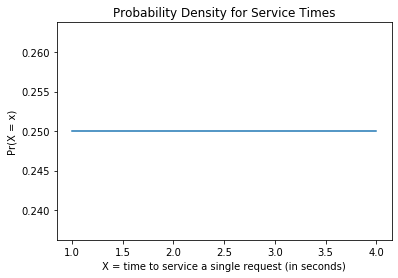

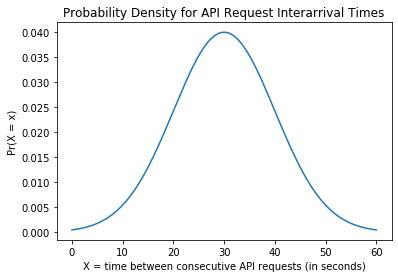

In [6]:
## Probability Model -> assumptions about the way API calls arrive and how long they take to process must be made
from random import uniform
from numpy import log, cos, sin, sqrt, pi, exp, linspace
from pylab import plot, show, title, xlabel, ylabel, legend

# Arrival Process - How do the API requests arrive?
mu = 30 #on average every API request arrives every mu seconds
sigma = 10 #standard deviation of sigma
interArrivalTimeRange = [0, 2*mu]
def sampleInterArrivalTime(): #number of seconds between API calls
    #normal distribution with mean mu and standard deviation sigma
    U1 = uniform(0, 1)
    U2 = uniform(0, 1)
    Z = sqrt(-2*log(U1))*cos(2*pi*U2)
    return mu + sigma*Z

# Service Process - How long does each person take to respon
d to every API request?
serviceTimeRange = [1, 5]
def sampleServiceTime(): #number of seconds it takes for human to service API call
    return uniform(serviceTimeRange[0], serviceTimeRange[1])

#Plot service time distribution
a = serviceTimeRange[0] #fastest time worker takes to respond
b = serviceTimeRange[1] #slowest time worker takes to respond

#Assumption -> the time it takes to service an API request is uniformly distributed over some interval
servicetimes = list(range(a, b))
plot(servicetimes, [1/(b-a) for x in servicetimes])
title("Probability Density for Service Times")
xlabel("X = time to service a single request (in seconds)")
ylabel("Pr(X = x)")
show()

#Plot API request arrival time distribution

def P(x):
    return exp(-(x - mu)**2/(2*sigma**2))/(sigma*sqrt(2*pi))

linspace(interArrivalTimeRange[0], interArrivalTimeRange[1], 1000)
interarrivaltimes = linspace(interArrivalTimeRange[0], interArrivalTimeRange[1], 1000)
plot(interarrivaltimes, [P(x) for x in interarrivaltimes])
title("Probability Density for API Request Interarrival Times")
xlabel("X = time between consecutive API requests (in seconds)")
ylabel("Pr(X = x)")
show()

$\textbf{Simulation Code}$

In [7]:
def isDayOver(clock):
    return clock >= 86400 #24 hours = 86400 seconds

def runSimulation(numCalls):
    
    #first API call is special because there it is never queued
    arrivalTime = sampleInterArrivalTime() #arrival time of first API call
    timeServiceBegins = arrivalTime #first API is served when as soon as it arrives 
    serviceTime = sampleServiceTime() #time it takes for CloudCars to classify image
    timeServiceEnds = timeServiceBegins + serviceTime
    totalAPICallsAnswered = 1 
    totalWaitingTime = 0 #total waiting time in minutes
    totalTimeInSystem = serviceTime
    numberOfQueuedAPIRequests = 0
    #answered first API call
    
    for i in range(numCalls - 1):
        if (isDayOver(arrivalTime) or totalAPICallsAnswered >= numCalls):
            break
            
        #next request
        timeServiceBegins = max([arrivalTime, timeServiceEnds]) #time service begins
        serviceTime = sampleServiceTime() #time it takes for service
        timeServiceEnds = timeServiceBegins + serviceTime #time service ends
        waitTime = timeServiceBegins - arrivalTime #time request spent in queue
        totalTimeInSystem += waitTime + serviceTime #total time in the system
        totalAPICallsAnswered += 1 #API response sent back out

        #lets look at what happened to this API call
        if (waitTime > 0): #customer had to wait in line
            totalWaitingTime += waitTime
            numberOfQueuedAPIRequests += 1

        #update clock for next request
        arrivalTime += sampleInterArrivalTime()
    print("Total Time: {:.2f} hours".format(arrivalTime/3600))
    print("Average time any given API request is queued: {:.2f} seconds".format(totalWaitingTime/totalAPICallsAnswered))
    print("Average time a queued API request spends in queue: {:.2f} seconds".format(totalWaitingTime/numberOfQueuedAPIRequests))
    print("Average time between request and response: {:.2f} seconds".format(totalTimeInSystem/totalAPICallsAnswered))
    print("Probability API request needs to be queued: {}".format(numberOfQueuedAPIRequests/totalAPICallsAnswered))

$\textbf{1 worker handling 500 API calls with 30 sec between every request on average with standard deviation of 10 sec}$

In [5]:
#Simulation results given above random distributions
runSimulation(500)

Total Time: 1.34 hours
Average time any given API request is queued: 2.94 seconds
Average time a queued API request spends in queue: 8.03 seconds
Average time between request and response: 5.92 seconds
Probability API request needs to be queued: 0.366
